In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\Rochish\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC


from the info we can see that there are 3 float, 35 integer values and 43 objects in the data set

In [6]:
df.columns[df.isnull().any()] 

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
null_2 = df.isnull().sum()/len(df)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

As per the data description "LotFrontage" is Linear feet of street connected to property.  
Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

In [8]:
df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

selecting only the float and integer data types for further process

In [9]:
df_IF=df.select_dtypes(include=['float64', 'int64'])

In [10]:
df_IF.columns[df_IF.isnull().any()] 

Index(['MasVnrArea', 'GarageYrBlt'], dtype='object')

In [11]:
df_IF["GarageYrBlt"].fillna(df_IF["GarageYrBlt"].median(), inplace=True)
df_IF["MasVnrArea"].fillna(df_IF["MasVnrArea"].median(), inplace=True)

In [12]:
df_IF.columns[df_IF.isnull().any()] 

Index([], dtype='object')

In [13]:
df_IF=df_IF.drop(['Id'], axis=1)

In [14]:
df_IF

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [15]:
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

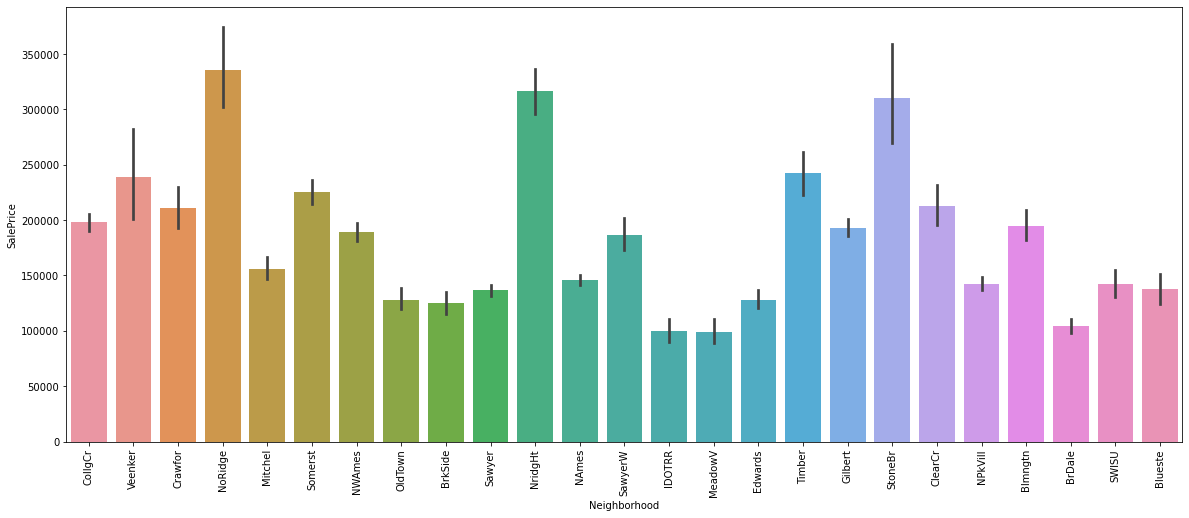

In [16]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= df)
plt.xticks(rotation=90)
     

from the above barplot we can understand in few neighbourhoods the prices are high

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

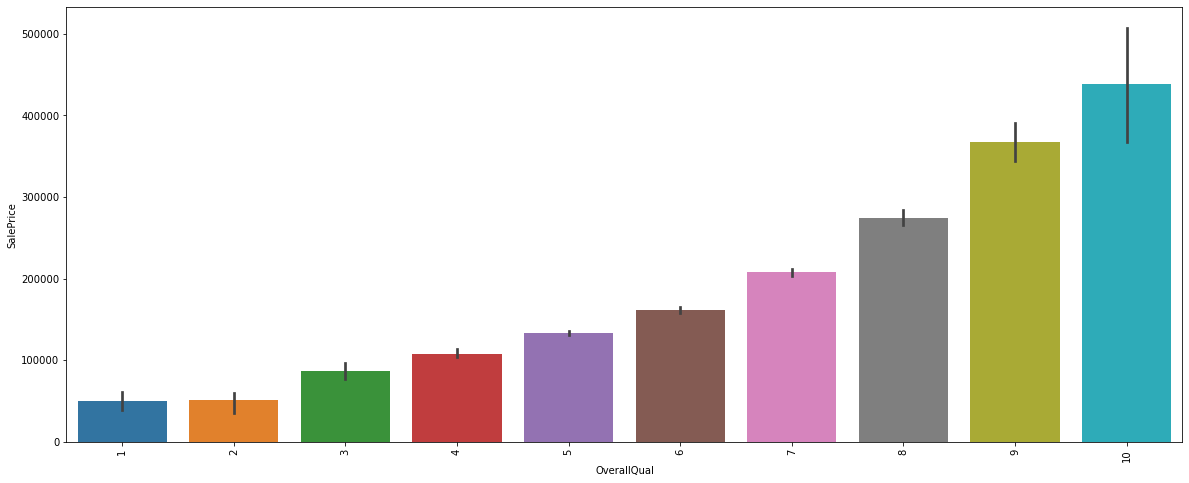

In [17]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.xticks(rotation=90)

by the above barplot we can know that based on the quality the sale price is going high

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

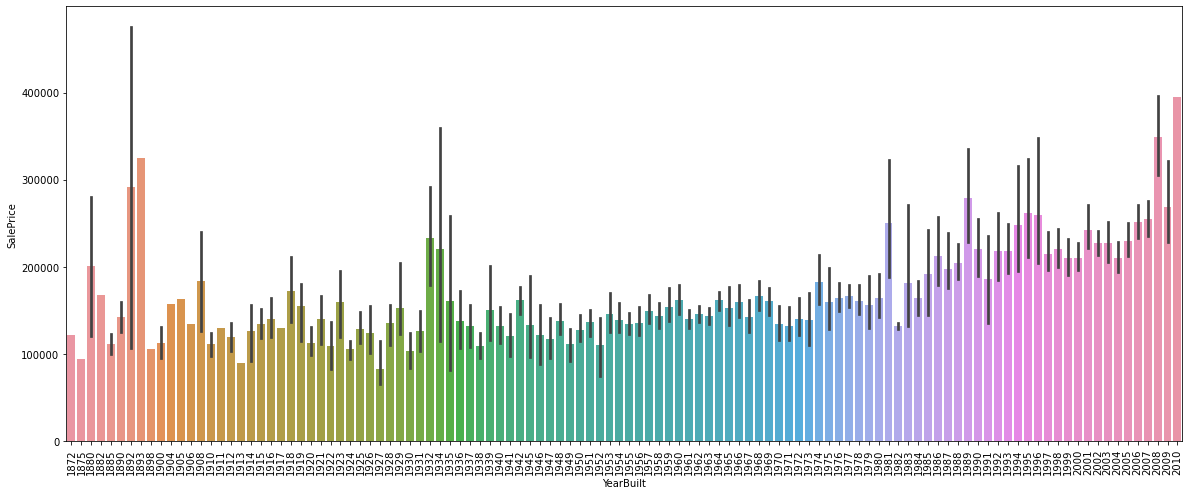

In [18]:
plt.figure(figsize=(20, 8))
sns.barplot(x="YearBuilt", y="SalePrice", data= df)
plt.xticks(rotation=90)

by the above barplot we can understand the price growth over the years

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

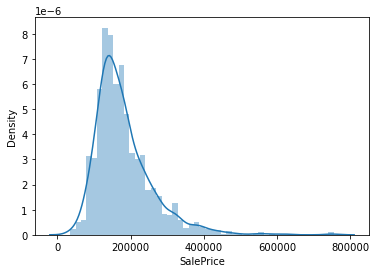

In [19]:
sns.distplot(df_IF['SalePrice'])

by the distplot we see that salesprice is skewed different so lets apply log to make it centre

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

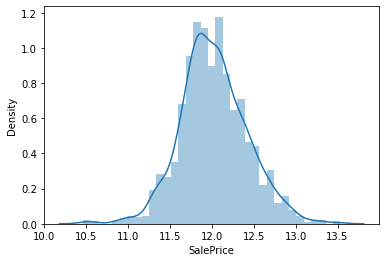

In [20]:
df_IF['SalePrice']=np.log1p(df_IF['SalePrice'])

sns.distplot(df_IF['SalePrice'])
     

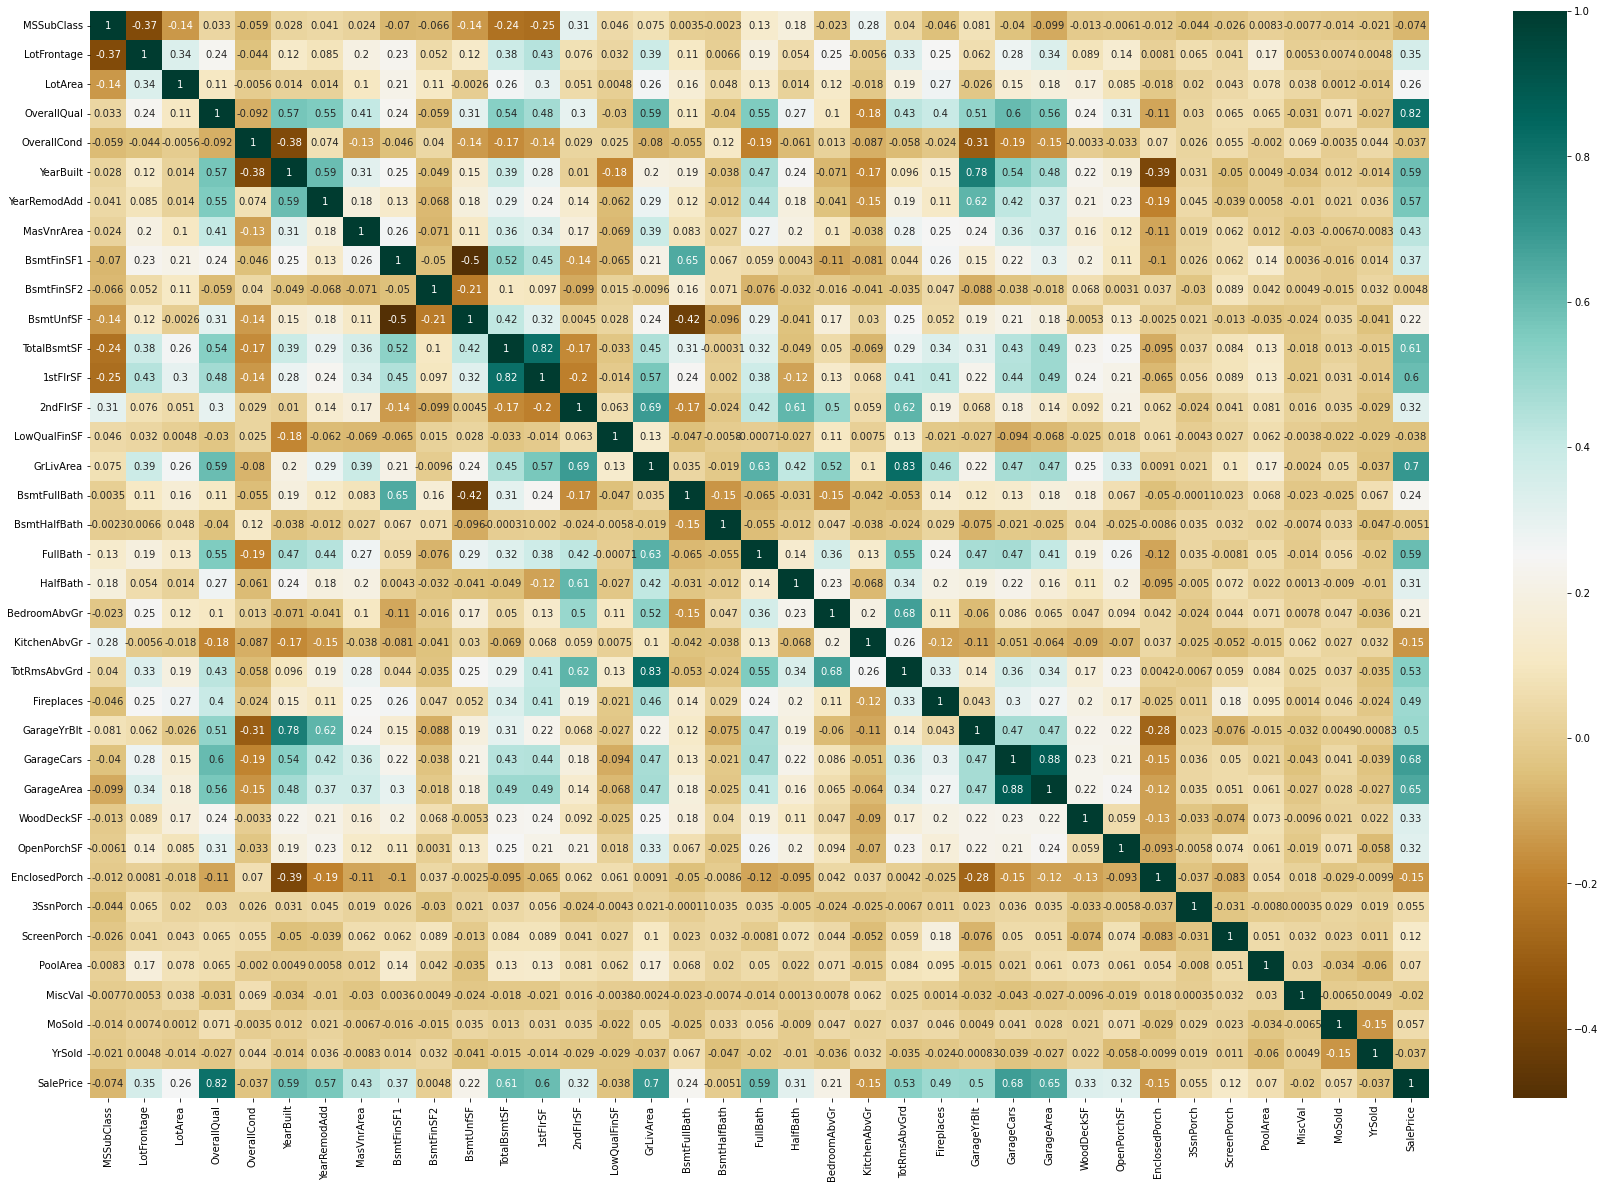

In [21]:
cor = df_IF.corr()
plt.figure(figsize=(30,20))

sns.heatmap(cor, cmap="BrBG", annot=True)
plt.show()

we can see that some of the columns are correlated and need to be dropped

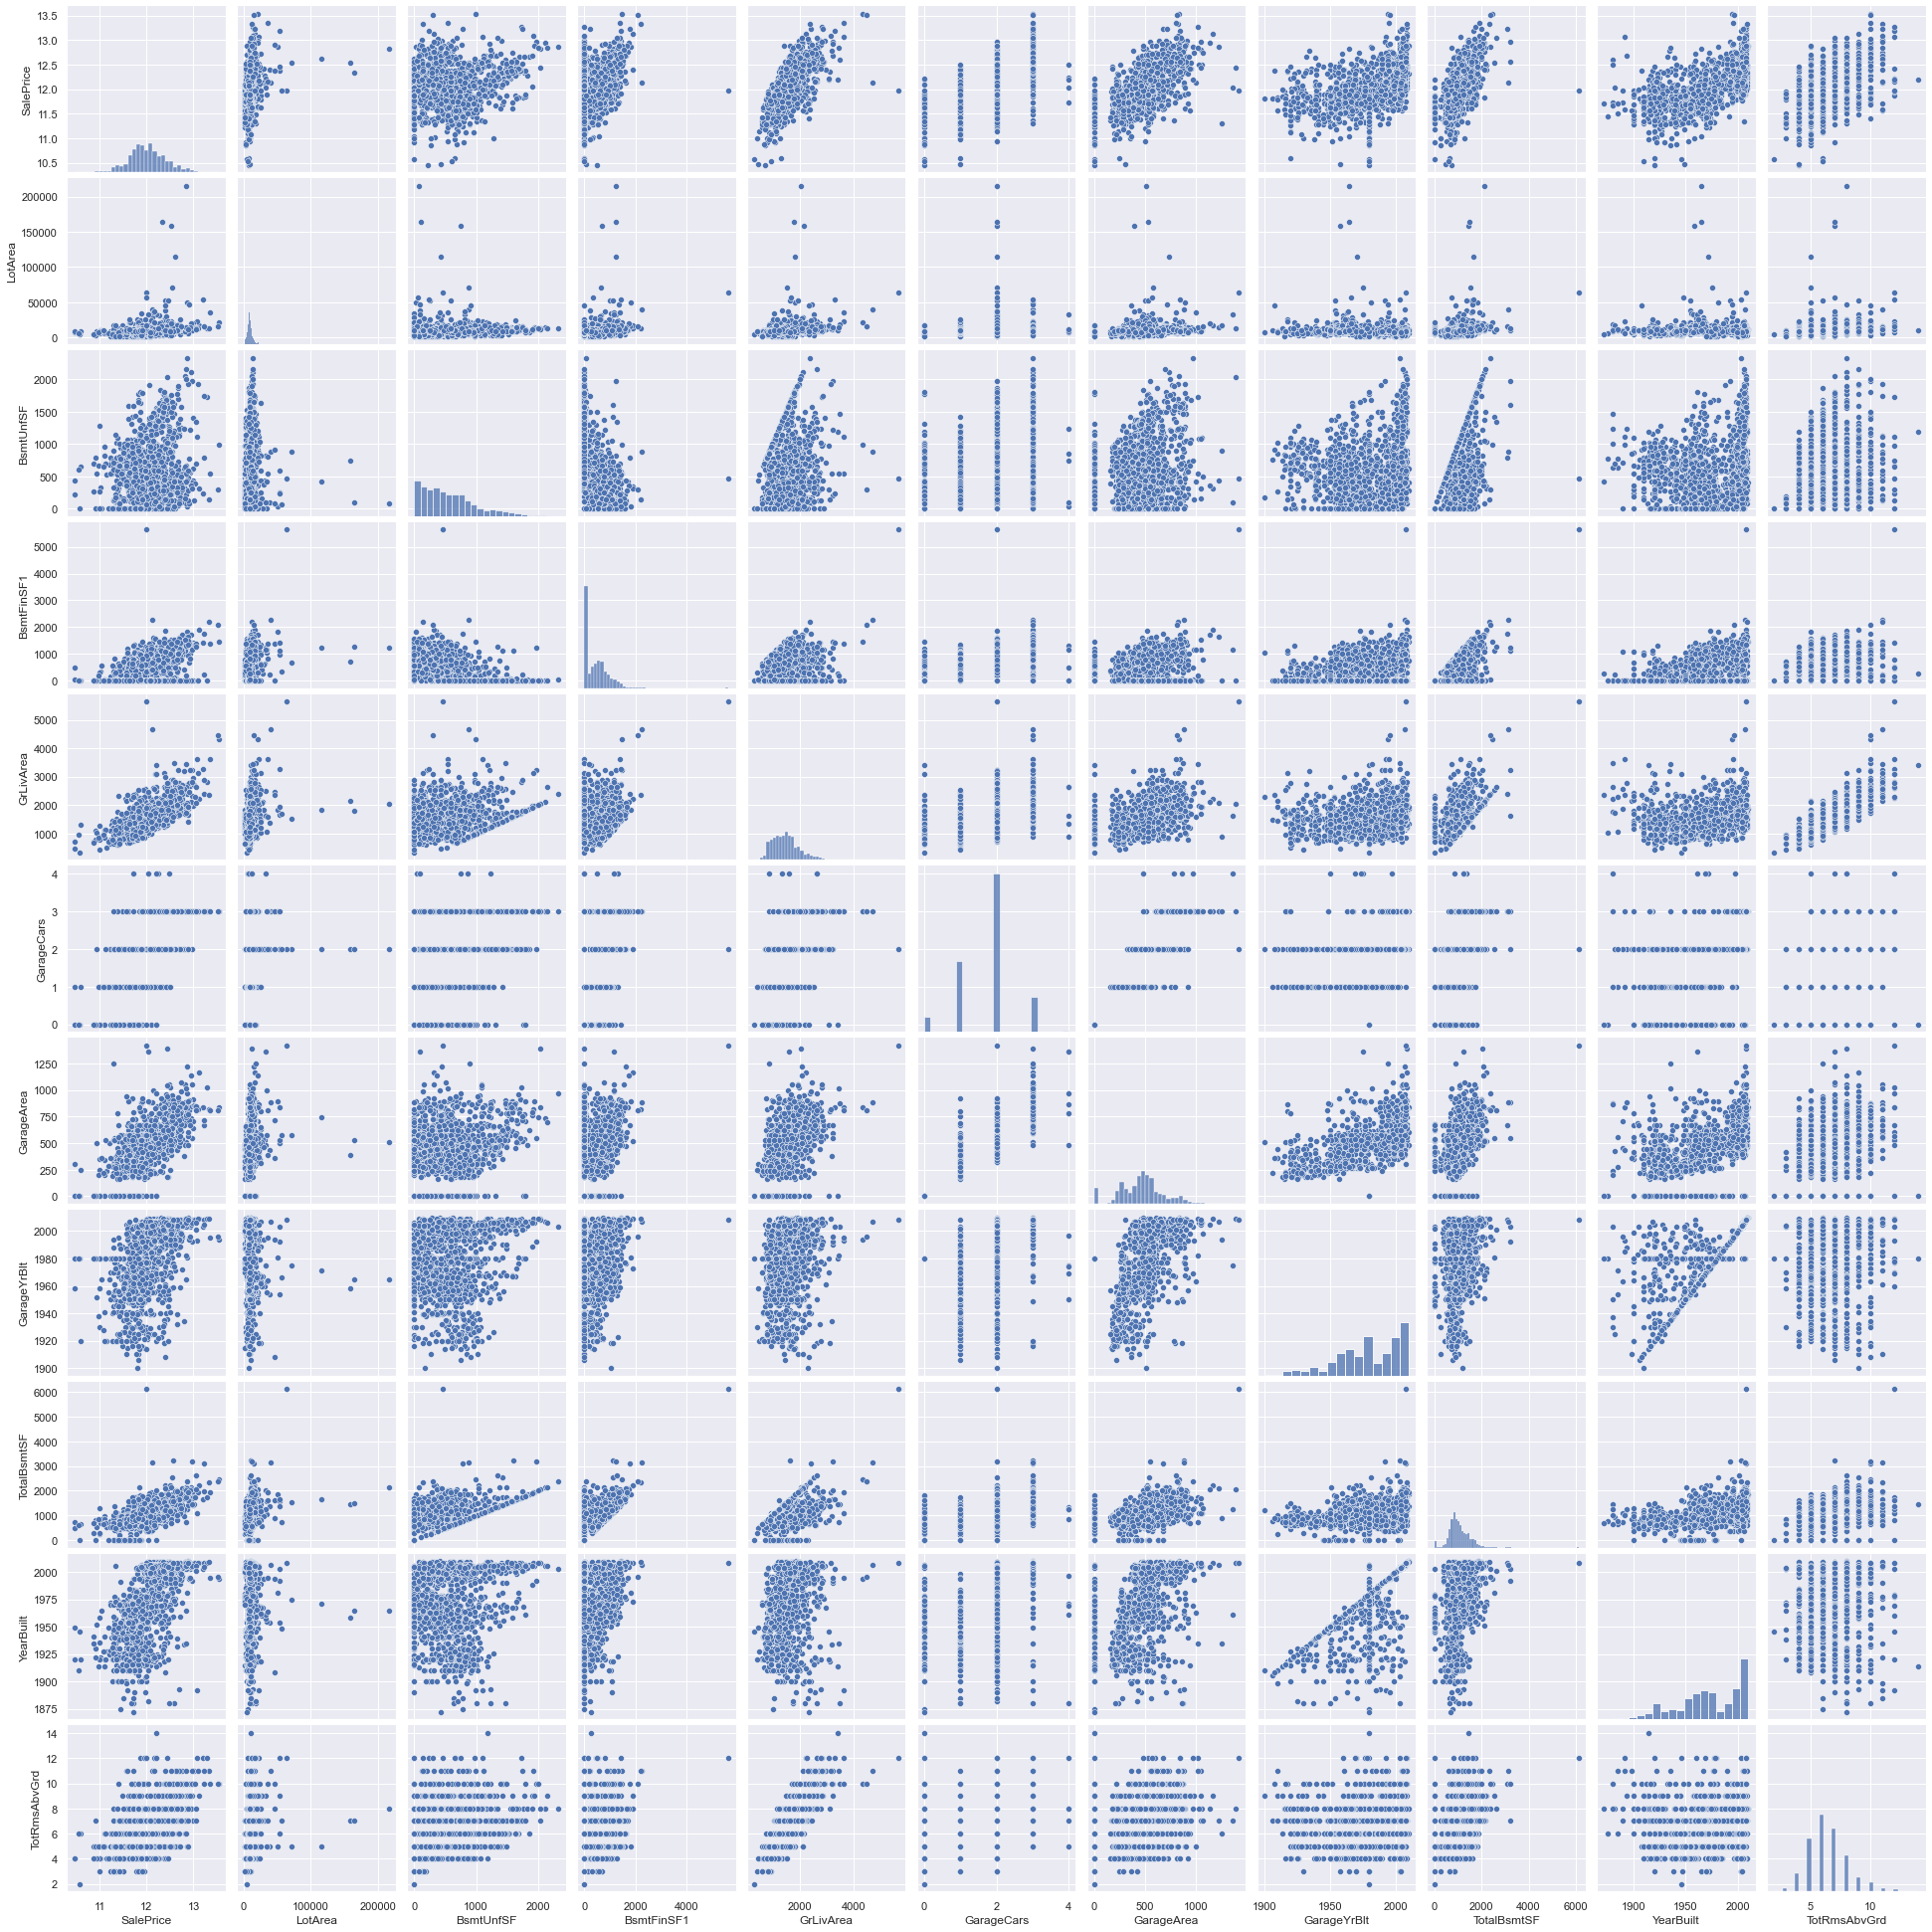

In [23]:
sns.set()
cols = ['SalePrice','LotArea', 'BsmtUnfSF', 'BsmtFinSF1', 'GrLivArea', 'GarageCars', 'GarageArea', 'GarageYrBlt', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd']
sns.pairplot(df_IF[cols], size = 2.5)
plt.show()

dropping the columns which are correlated and not contributing wih sales price column

In [24]:
df_IF = df_IF.drop(['GarageCars'], axis = 1)
df_IF = df_IF.drop(['BsmtUnfSF'], axis = 1)
df_IF = df_IF.drop(['TotRmsAbvGrd'], axis = 1)
df_IF = df_IF.drop(['GarageYrBlt'], axis = 1)    



lets check few columns and remove outliers

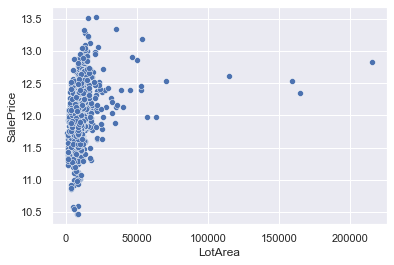

In [27]:
sns.scatterplot(x = df_IF['LotArea'], y = df_IF['SalePrice'])
plt.show()

In [40]:


def remove_outliers(x,y):
    Q1 = x[y].quantile(0.25)
    Q3 = x[y].quantile(0.75)
    IQR = Q3 - Q1

    x = x[~((x[y] < (Q1 - 1.5 * IQR)) | (x[y] > (Q3 + 1.5 * IQR)))]

    return x

In [41]:
df_IF = remove_outliers(df_IF,'LotArea')

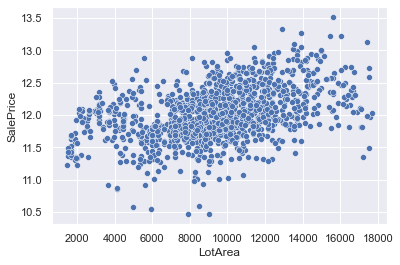

In [42]:
sns.scatterplot(x = df_IF['LotArea'], y = df_IF['SalePrice'])
plt.show()

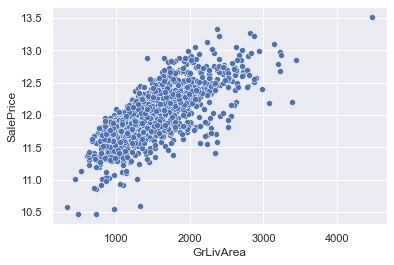

In [43]:
sns.scatterplot(x = df_IF['GrLivArea'], y = df_IF['SalePrice'])
plt.show()

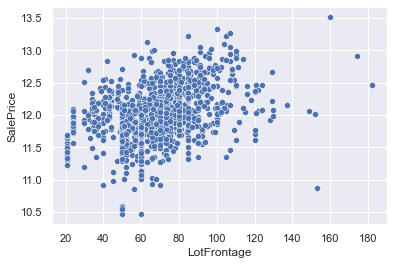

In [44]:
sns.scatterplot(x = df_IF['LotFrontage'], y = df_IF['SalePrice'])
plt.show()

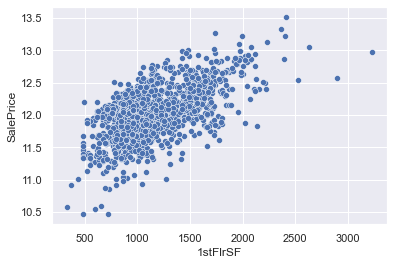

In [45]:
sns.scatterplot(x = df_IF['1stFlrSF'], y = df_IF['SalePrice'])
plt.show()

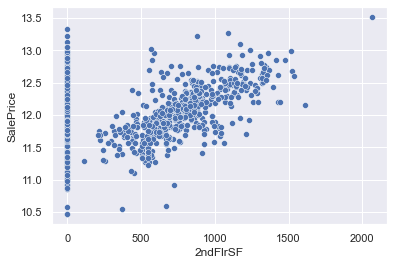

In [46]:
sns.scatterplot(x = df_IF['2ndFlrSF'], y = df_IF['SalePrice'])
plt.show()

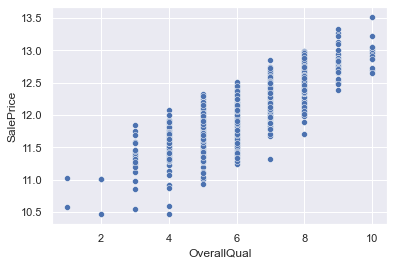

In [47]:
sns.scatterplot(x = df_IF['OverallQual'], y = df_IF['SalePrice'])
plt.show()

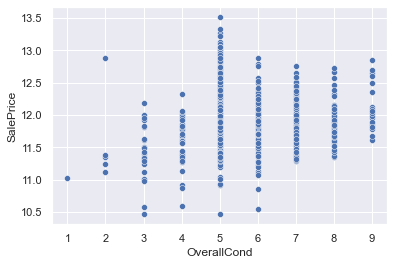

In [48]:
sns.scatterplot(x = df_IF['OverallCond'], y = df_IF['SalePrice'])
plt.show()

there are few unnecessary columns so we can drop them

In [49]:
df_IF = df_IF.drop(['MoSold'], axis = 1)
df_IF = df_IF.drop(['YrSold'], axis = 1)
df_IF = df_IF.drop(['YearBuilt'], axis = 1)
df_IF = df_IF.drop(['YearRemodAdd'], axis = 1)

     

# data preparation

In [50]:
X = df_IF.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,1,0,548,0,61,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,1,1,460,298,0,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,1,1,608,0,42,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,1,1,642,0,35,272,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,1,1,836,192,84,0,0,0,0,0


In [51]:
y = df_IF['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

# Model building

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [54]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [55]:
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)


In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', False, 14),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 13),
 ('BsmtFinSF1', False, 9),
 ('BsmtFinSF2', False, 12),
 ('TotalBsmtSF', False, 3),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 2),
 ('LowQualFinSF', False, 4),
 ('GrLivArea', False, 8),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 7),
 ('OpenPorchSF', False, 10),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', False, 15),
 ('ScreenPorch', False, 5),
 ('PoolArea', False, 6),
 ('MiscVal', False, 11)]

In [57]:
col = X_train.columns[rfe.support_]
col
     

Index(['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond', '1stFlrSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'EnclosedPorch'],
      dtype='object')

In [58]:
X_train.columns[~rfe.support_]

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [59]:
X_train_rfe = X_train[col]
X_train_rfe = pd.DataFrame(X_train[col])
X_train_rfe.head()

,MSSubClass,LotFrontage,OverallQual,OverallCond,1stFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,EnclosedPorch
989,60,65.0,7,5,778,0,0,2,1,3,1,0,614,0
1076,50,60.0,5,8,1096,0,1,2,0,3,1,1,566,0
959,160,24.0,7,5,696,1,0,2,1,3,1,0,484,0
1254,60,60.0,7,5,760,0,0,2,1,3,1,1,397,0
1049,20,60.0,4,7,930,0,0,1,0,2,1,0,308,0


In [60]:
X_train_rfe.shape

(973, 14)

In [62]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [63]:
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.8801184056297965

In [64]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.871607168338827

eventhough the model performance is well lets check how would it perform on lasso and ridge

# Lasso Regression

In [65]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:

# lasso_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004876,0.005054,0.001004,0.000014,0.0001,{'alpha': 0.0001},-0.099723,-0.099196,-0.119147,-0.088389,...,-0.101342,0.009932,1,-0.097084,-0.098809,-0.093254,-0.101042,-0.097752,-0.097588,0.002549
1,0.001822,0.000527,0.001198,0.000398,0.001,{'alpha': 0.001},-0.099420,-0.100393,-0.117792,-0.088821,...,-0.101353,0.009306,2,-0.097312,-0.098835,-0.093607,-0.101398,-0.098044,-0.097839,0.002525
2,0.001805,0.000408,0.001002,0.000009,0.01,{'alpha': 0.01},-0.102560,-0.112001,-0.118933,-0.098848,...,-0.107663,0.007105,3,-0.104361,-0.103981,-0.101667,-0.107695,-0.105572,-0.104655,0.001977
3,0.001794,0.000399,0.000797,0.000399,0.05,{'alpha': 0.05},-0.109116,-0.116862,-0.127852,-0.101616,...,-0.114908,0.008934,4,-0.112201,-0.110285,-0.111232,-0.115363,-0.112881,-0.112392,0.001725
4,0.001794,0.000399,0.000797,0.000399,0.1,{'alpha': 0.1},-0.132974,-0.130909,-0.148767,-0.125043,...,-0.136318,0.008718,5,-0.133150,-0.131465,-0.131314,-0.135786,-0.133010,-0.132945,0.001610


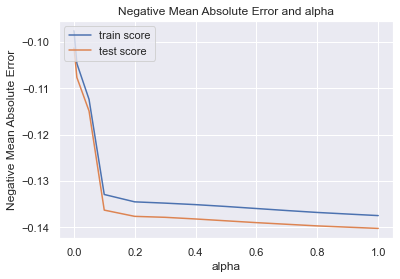

In [70]:

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [71]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_
     

array([-1.19505275e-04,  9.74378392e-04,  7.10038048e-06,  1.00278333e-01,
        3.43381514e-02,  2.32462151e-05,  6.78195771e-05,  2.31815015e-05,
        1.35068080e-04,  1.81206381e-04,  1.62865680e-04, -1.81214377e-04,
        2.21929030e-05,  4.72104371e-02,  0.00000000e+00,  9.72998024e-02,
        5.68807305e-02, -2.33561972e-02, -9.84975947e-02,  1.75180942e-02,
        2.75155080e-04,  9.13104464e-05, -1.32034949e-05, -3.01124430e-04,
        1.15064322e-05,  1.43125626e-04, -1.04320246e-04, -2.50178113e-05])

In [72]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.451),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.001),
 ('LotArea', 0.0),
 ('OverallQual', 0.1),
 ('OverallCond', 0.034),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.047),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.097),
 ('HalfBath', 0.057),
 ('BedroomAbvGr', -0.023),
 ('KitchenAbvGr', -0.098),
 ('Fireplaces', 0.018),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0)]

In [73]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.87967346577171
0.8716541808040018


In [74]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.14289632243106948


The R2 values for Train and Test good, since its a good model

In [75]:

# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [76]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,10.451
1,MSSubClass,-0.000
2,LotFrontage,0.001
3,LotArea,0.000
4,OverallQual,0.100


In [77]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,10.451
4,OverallQual,0.100
16,FullBath,0.097
17,HalfBath,0.057
14,BsmtFullBath,0.047
5,OverallCond,0.034
20,Fireplaces,0.018
2,LotFrontage,0.001
8,BsmtFinSF2,0.000
9,TotalBsmtSF,0.000


In [78]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,10.451
4,OverallQual,0.100
16,FullBath,0.097
17,HalfBath,0.057
14,BsmtFullBath,0.047
5,OverallCond,0.034
20,Fireplaces,0.018
2,LotFrontage,0.001
18,BedroomAbvGr,-0.023
19,KitchenAbvGr,-0.098


In [79]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'OverallQual', 'FullBath', 'HalfBath', 'BsmtFullBath', 'OverallCond', 'Fireplaces', 'LotFrontage', 'BedroomAbvGr', 'KitchenAbvGr']


In [81]:
X_train_lasso = X_train[['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']]
                        
X_train_lasso.head()
     

,OverallQual,BsmtFinSF1,TotalBsmtSF,GrLivArea,GarageArea
989,7,0,770,1576,614
1076,5,626,796,1466,566
959,7,604,696,1416,484
1254,7,0,746,1656,397
1049,4,0,0,930,308


In [83]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath',  'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

,GrLivArea,OverallQual,OverallCond,TotalBsmtSF,GarageArea,BsmtFinSF1,Fireplaces,LotArea,LotFrontage,BsmtFullBath,OpenPorchSF,FullBath,ScreenPorch,WoodDeckSF
552,1717,8,5,1709,908,0,1,11146,87.0,0,39,2,0,169
884,892,5,5,892,288,432,0,7150,65.0,0,0,1,0,0
732,2031,7,5,1153,541,252,1,11404,75.0,0,84,2,0,192
230,1194,6,6,1194,312,0,0,8760,73.0,1,0,1,0,0
1188,1660,7,5,831,493,0,0,8935,68.0,0,68,2,0,144


# Ridge Regression



In [84]:

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
     

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009179,0.015869,0.000798,0.000399,0.0001,{'alpha': 0.0001},-0.099769,-0.099045,-0.119324,-0.088416,...,-0.101362,0.009993,1,-0.097088,-0.098834,-0.093241,-0.101015,-0.097729,-0.097582,0.002548
1,0.001422,0.000469,0.000598,0.000488,0.001,{'alpha': 0.001},-0.099769,-0.099045,-0.119324,-0.088416,...,-0.101362,0.009993,2,-0.097088,-0.098834,-0.093242,-0.101015,-0.097729,-0.097582,0.002548
2,0.001595,0.000465,0.000985,0.000630,0.01,{'alpha': 0.01},-0.099770,-0.099047,-0.119322,-0.088417,...,-0.101362,0.009993,3,-0.097088,-0.098834,-0.093242,-0.101016,-0.097730,-0.097582,0.002548
3,0.001035,0.000023,0.000981,0.000015,0.05,{'alpha': 0.05},-0.099770,-0.099052,-0.119316,-0.088418,...,-0.101362,0.009990,4,-0.097088,-0.098835,-0.093244,-0.101018,-0.097731,-0.097583,0.002548
4,0.001392,0.000465,0.000607,0.000497,0.1,{'alpha': 0.1},-0.099771,-0.099060,-0.119308,-0.088419,...,-0.101362,0.009987,5,-0.097088,-0.098836,-0.093246,-0.101021,-0.097732,-0.097585,0.002548


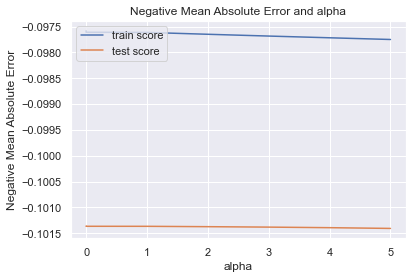

In [86]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [87]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.00882331e-04,  1.00673562e-03,  7.10284393e-06,  9.80943196e-02,
        3.59333785e-02,  2.12134740e-05,  5.90832564e-05,  1.53012589e-05,
        1.36517507e-04,  1.44121829e-04,  1.18266746e-04, -2.01644014e-04,
        6.07445349e-05,  5.61837538e-02,  4.53635020e-03,  1.07798871e-01,
        6.47423923e-02, -2.52140297e-02, -1.22243970e-01,  1.97110701e-02,
        2.70951595e-04,  8.20008257e-05, -3.00822494e-05, -2.91485849e-04,
        1.85513781e-06,  1.39983946e-04, -1.08819375e-04, -2.51853223e-05])

In [88]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
     

[('constant', 10.464),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.001),
 ('LotArea', 0.0),
 ('OverallQual', 0.098),
 ('OverallCond', 0.036),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.056),
 ('BsmtHalfBath', 0.005),
 ('FullBath', 0.108),
 ('HalfBath', 0.065),
 ('BedroomAbvGr', -0.025),
 ('KitchenAbvGr', -0.122),
 ('Fireplaces', 0.02),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0)]

In [89]:

# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8800987990878533
0.8717488549335807


It is visible that the model performance is same as Lasso. The train and the test scores are matching well

In [91]:

# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))
     

In [92]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,10.464
16,FullBath,0.108
4,OverallQual,0.098
17,HalfBath,0.065
14,BsmtFullBath,0.056
5,OverallCond,0.036
20,Fireplaces,0.020
15,BsmtHalfBath,0.005
2,LotFrontage,0.001
9,TotalBsmtSF,0.000


In [93]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE
     

,Variable,Coeff
0,constant,10.464
16,FullBath,0.108
4,OverallQual,0.098
17,HalfBath,0.065
14,BsmtFullBath,0.056
5,OverallCond,0.036
20,Fireplaces,0.020
15,BsmtHalfBath,0.005
2,LotFrontage,0.001
9,TotalBsmtSF,0.000


In [94]:
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE
     

,Variable,Coeff
0,constant,10.464
16,FullBath,0.108
4,OverallQual,0.098
17,HalfBath,0.065
14,BsmtFullBath,0.056
5,OverallCond,0.036
20,Fireplaces,0.020
15,BsmtHalfBath,0.005
2,LotFrontage,0.001
18,BedroomAbvGr,-0.025
